In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [3]:
sc.settings.verbosity = 3

In [6]:
%%R
suppressPackageStartupMessages(library(Seurat))

In [5]:
##这里-o MSC_sce 是告诉anndata2ri 这个文件弄成AnnData格式

In [7]:
%%R -o MSC_sce
MSC_sce=readRDS('/home/gaoyuchen/Scanpy_PAGA_Data/MSC_SingleCellExperiment/MSC_sce.rds')

In [8]:
MSC_sce

AnnData object with n_obs × n_vars = 45955 × 17866
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'group', 'integrated_snn_res.0.6', 'seurat_clusters', 'integrated_snn_res.0.5', 'integrated_snn_res.0.4', 'Tissue', 'Cluster', 'ident'
    obsm: 'X_pca', 'X_umap'
    layers: 'logcounts'

In [36]:
MSC_sce.obs['integrated_snn_res.0.4'] = MSC_sce.obs['integrated_snn_res.0.4'].astype('category')

In [38]:
sc.pp.neighbors(MSC_sce, n_neighbors=20, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [39]:
#sc.tl.paga(MSC_sce, groups='leiden')
sc.tl.paga(MSC_sce, groups='integrated_snn_res.0.4')

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:01)


In [40]:
 MSC_sce.obs['integrated_snn_res.0.4']

AD1_AAACCTGAGCACACAG    0
AD1_AAACCTGCAAAGGAAG    0
AD1_AAACCTGCATCCGGGT    1
AD1_AAACCTGCATTAGCCA    1
AD1_AAACCTGGTATCACCA    0
                       ..
UC3_TTTGGTTTCACCTCGT    2
UC3_TTTGGTTTCCTTTCTC    0
UC3_TTTGTCAAGAGCCTAG    3
UC3_TTTGTCACATTGCGGC    3
UC3_TTTGTCATCCTGTAGA    1
Name: integrated_snn_res.0.4, Length: 45955, dtype: category
Categories (7, object): [0, 1, 2, 3, 4, 5, 6]

--> added 'pos', the PAGA positions (adata.uns['paga'])


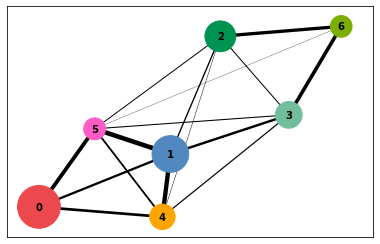

In [74]:
sc.pl.paga(MSC_sce, node_size_scale=4.5,edge_width_scale=1.5,node_size_power=1,save='PAGA_Seurat_Cluster.pdf')